In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
img= cv2.imread('./test images1/o1.jpg')
img.shape

(647, 970, 3)

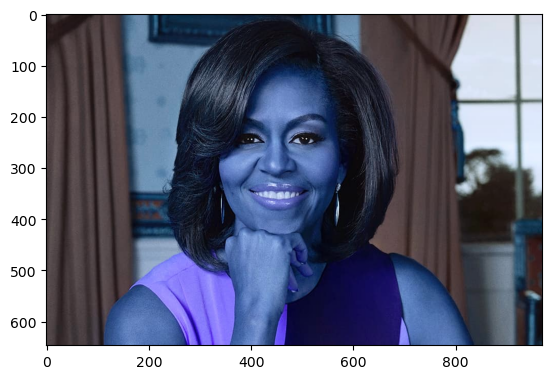

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(647, 970)

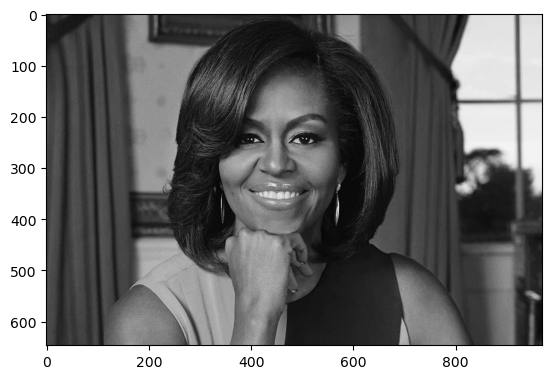

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[323, 130, 280, 280]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(323, 130, 280, 280)

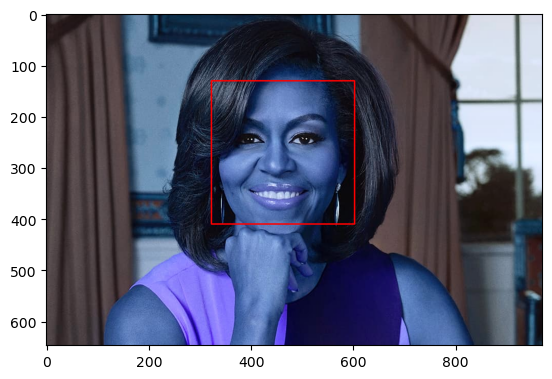

In [8]:
faces_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(faces_img)

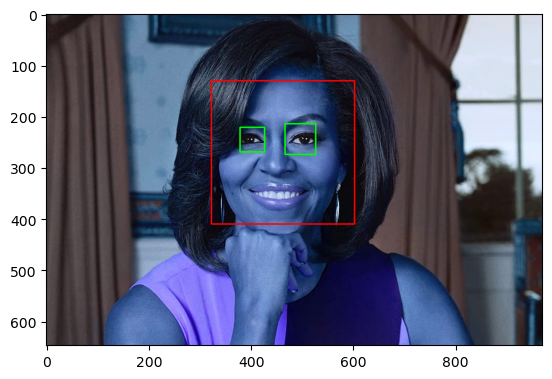

In [9]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    center=(x+w//2,y+h//2)
    faces_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    roi_gray=gray[y:y+h,x:x+w]
    roi_color=faces_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
       # eye_center = (x + ex + ew//2, y + ey + eh//2)
        #radius = int(round((ew + eh)*0.25))
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(faces_img,cmap='gray')
plt.show()

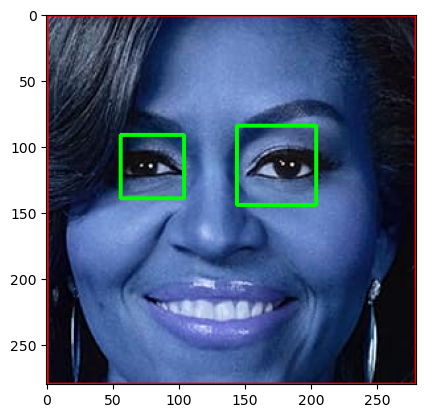

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_images_with_eyes(image_path):
    img=cv2.imread(image_path)
    
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    
    cropped_images=[]
    
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [1]:
original_img= cv2.imread('./test images1/o1.jpg')
plt.imshow(original_img)

NameError: name 'cv2' is not defined

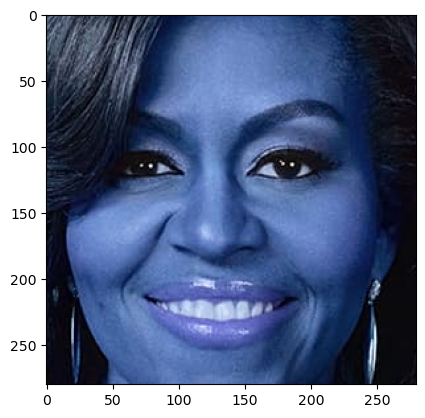

In [12]:
cropped_img=get_cropped_images_with_eyes('./test images1/o1.jpg')
plt.imshow(cropped_img)

In [ ]:
#beyonce1.jpg
original_img= cv2.imread('./test images/beyonce1.jpg')
plt.imshow(original_img)

In [ ]:
cropped_img_no_eyes=get_cropped_images_with_eyes('./test images/beyonce1.jpg')
cropped_img_no_eyes


In [13]:
path_to_dataset='./dataset1/'
path_to_Cropped_data='./dataset1/cropped/'

In [14]:
import os
img_dirs=[]
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./dataset1/Aung_Sang_Suu_Kyi',
 './dataset1/Malala_Yousafzai',
 './dataset1/Michelle_Obama',
 './dataset1/Oprah_Winfrey',
 './dataset1/Princess_Diana']

In [16]:
import shutil
if os.path.exists(path_to_Cropped_data):
    shutil.rmtree(path_to_Cropped_data)
os.mkdir(path_to_Cropped_data)

In [ ]:
{
    'adele':[
        './dataset/cropped/adele/adele1.png',
        './dataset/cropped/adele/adele2.png'
    ],
    'arianna grande':[
        './dataset/cropped/adele/arianna grande1.png'
    ]
}

In [17]:
cropped_img_dir=[]
celebrity_filename_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_filename_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_images_with_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_Cropped_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print("creating cropped images in folder:",cropped_folder)
                
            cropped_filename=celebrity_name+str(count)+".png"
            cropped_filepath=cropped_folder+"/"+cropped_filename
        
            cv2.imwrite(cropped_filepath,roi_color)
            celebrity_filename_dict[celebrity_name].append(cropped_filepath)
            count+=1
            

Aung_Sang_Suu_Kyi
creating cropped images in folder: ./dataset1/cropped/Aung_Sang_Suu_Kyi
Malala_Yousafzai
creating cropped images in folder: ./dataset1/cropped/Malala_Yousafzai
Michelle_Obama
creating cropped images in folder: ./dataset1/cropped/Michelle_Obama
Oprah_Winfrey
creating cropped images in folder: ./dataset1/cropped/Oprah_Winfrey
Princess_Diana
creating cropped images in folder: ./dataset1/cropped/Princess_Diana


# wavelength transform

In [18]:
import numpy as np
import pywt#pz wavelength transform
def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #compute coefficient
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #processing coefficient
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    
    

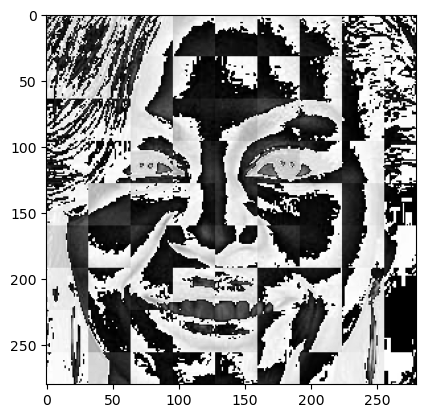

In [25]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [19]:
celebrity_filename_dict

{'Aung_Sang_Suu_Kyi': ['./dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi1.png',
  './dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi2.png',
  './dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi3.png',
  './dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi4.png',
  './dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi5.png',
  './dataset1/cropped/Aung_Sang_Suu_Kyi/Aung_Sang_Suu_Kyi6.png'],
 'Malala_Yousafzai': ['./dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai1.png',
  './dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai2.png',
  './dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai3.png',
  './dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai4.png',
  './dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai5.png',
  './dataset1/cropped/Malala_Yousafzai/Malala_Yousafzai6.png'],
 'Michelle_Obama': ['./dataset1/cropped/Michelle_Obama/Michelle_Obama1.png',
  './dataset1/cropped/Michelle_Obama/Michelle_Obama2.png',
  './dataset1/cropped/Michelle_Obama/Michelle_Obama3.

In [20]:
class_dict={}
count=0
for celebrity_name in celebrity_filename_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1

class_dict

{'Aung_Sang_Suu_Kyi': 0,
 'Malala_Yousafzai': 1,
 'Michelle_Obama': 2,
 'Oprah_Winfrey': 3,
 'Princess_Diana': 4}

In [22]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_filename_dict.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        rescaled_raw_img=cv2.resize(img,(32,32))
        im_har=w2d(img,'db1',5)
        rescaled_img_har=cv2.resize(im_har,(32,32))
        #vertically stack
        combined_img=np.vstack((rescaled_raw_img.reshape(32*32*3,1),rescaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [131]:
len(x)
#len(y)

43

In [132]:
len(x[0])
#len(y)

4096

In [23]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(32, 4096)

In [24]:
#training model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [25]:
x_train,x_test, y_train,y_test=train_test_split(x,y,random_state=0)

pipe= Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.625

In [136]:
len(x_test)

11

In [26]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           0.62         8
   macro avg       0.70      0.60      0.63         8
weighted avg       0.75      0.62      0.67         8



Using GridSearch wiht different models and parameters

In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [28]:
model_params ={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [29]:
score=[]
best_estimators={}

import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=2,return_train_score=False)
    clf.fit(x_train,y_train)
    score.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_

df=pd.DataFrame(score,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.625000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.500000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.833333,{'logisticregression__C': 1}


Estimators scores


In [30]:
best_estimators['svm'].score(x_test,y_test)

0.625

In [31]:
best_estimators['random_forest'].score(x_test,y_test)


0.375

In [32]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.625

In [33]:
best_clf=best_estimators['svm']

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

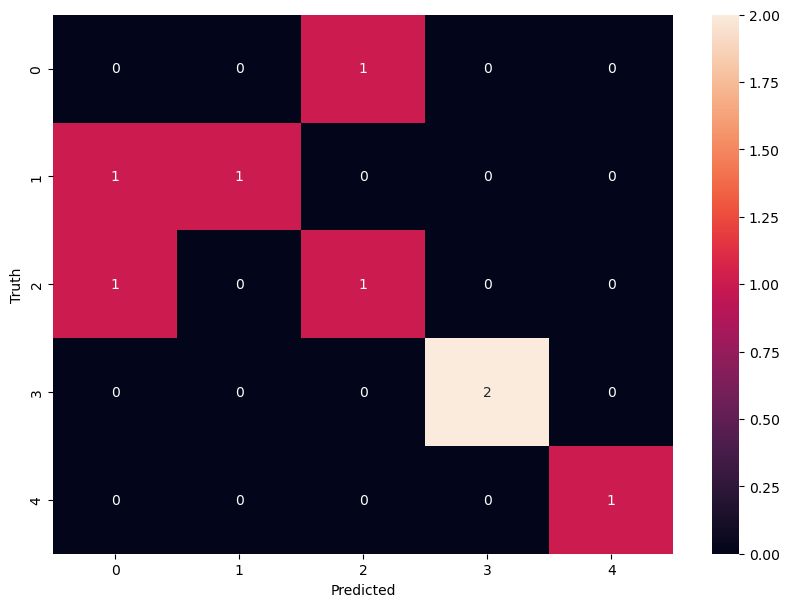

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
class_dict

{'Aung_Sang_Suu_Kyi': 0,
 'Malala_Yousafzai': 1,
 'Michelle_Obama': 2,
 'Oprah_Winfrey': 3,
 'Princess_Diana': 4}

saving trained model    

In [38]:
!pip install joblib
import joblib
#saving the model as a pickle in a file
joblib.dump(best_clf,'saved_model1.pkl')
    

Defaulting to user installation because normal site-packages is not writeable


['saved_model1.pkl']

#    save class dictionary

In [39]:
import json
with open('class_dictionary1.json','w') as f:
    f.write(json.dumps(class_dict))